In [1]:
from tools.numerical_gradient import *
from models.layers import *
from models.networks.vanilla_rnn import *
from models.solver.solver import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import h5py
import nltk
import re
import pickle

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
solver = Solver({"learning_rate" : 1e-2, "type" : "sgd"})
# let's create a basic SVM with some basic datasets!
# Create a basic linear model : above y = 1 is true, below y = 1 is false. 2 classes.
# 3d model:
x_const = np.random.random((5000, 4))*5 # 5000 samples, 3 classes
W_const = np.random.random((4,2))/100 # weights
b_const = np.zeros((2,)) # biases
y = np.zeros((5000,), int)

mask = np.random.choice(5000, 2500)

x_const[mask] += 4
y[mask] = 1
x_const[~mask] -= 4
y[~mask] = 0

In [3]:
# Run the loss function on the neural network with the parameters: y, h0
history_sgd = []
batch_size = 256
x = x_const.copy()
W = W_const.copy()
b = b_const.copy()
for i in xrange(300):
    batch_idx = np.random.choice(5000, 256)
    affine = affine_forward(x[batch_idx], W, b)
    loss, dJ = SVM(affine, y[batch_idx])
    dx, dw, db = affine_backward(x[batch_idx], W, b, dJ)
    l = [[W, dw],
         [b, db]]
    solver.train(l)
    history_sgd.append((i,loss))


In [4]:
solver = Solver({"learning_rate" : 1e-3, "type" : "momentum", "mu" : 0.95})
# Run the loss function on the neural network with the parameters: y, h0
history_momentum = []
x = x_const.copy()
W = W_const.copy()
b = b_const.copy()
for i in xrange(300):
    batch_idx = np.random.choice(5000, 256)
    affine = affine_forward(x[batch_idx], W, b)
    loss, dJ = SVM(affine, y[batch_idx])
    dx, dw, db = affine_backward(x[batch_idx], W, b, dJ)
    l = [[W, dw],
         [b, db]]
    solver.train(l)
    history_momentum.append((i,loss))
    

In [5]:
solver = Solver({"learning_rate" : 1e-1, "type" : "adagrad"}) # adagrad can sustain higher learning rates
# Run the loss function on the neural network with the parameters: y, h0
history_adagrad = []
x = x_const.copy()
W = W_const.copy()
b = b_const.copy()
for i in xrange(300):
    batch_idx = np.random.choice(5000, 256)
    affine = affine_forward(x[batch_idx], W, b)
    loss, dJ = SVM(affine, y[batch_idx])
    dx, dw, db = affine_backward(x[batch_idx], W, b, dJ)
    l = [[W, dw],
         [b, db]]
    solver.train(l)
    history_adagrad.append((i,loss))
    

In [6]:
solver = Solver({"learning_rate" : 1e-2, "type" : "rmsprop", "decay_rate" : 0.95}) # adagrad can sustain higher learning rates
# Run the loss function on the neural network with the parameters: y, h0
history_rmsprop = []
x = x_const.copy()
W = W_const.copy()
b = b_const.copy()
for i in xrange(300):
    batch_idx = np.random.choice(5000, 256)
    affine = affine_forward(x[batch_idx], W, b)
    loss, dJ = SVM(affine, y[batch_idx])
    dx, dw, db = affine_backward(x[batch_idx], W, b, dJ)
    l = [[W, dw],
         [b, db]]
    solver.train(l)
    history_rmsprop.append((i,loss))
    

In [7]:
solver = Solver({"learning_rate" : 1e-2, "type" : "adam", 
                 "beta1" : 0.9, "beta2" : 0.99}) # adagrad can sustain higher learning rates
# Run the loss function on the neural network with the parameters: y, h0
history_adam = []
x = x_const.copy()
W = W_const.copy()
b = b_const.copy()
for i in xrange(300):
    batch_idx = np.random.choice(5000, 256)
    affine = affine_forward(x[batch_idx], W, b)
    loss, dJ = SVM(affine, y[batch_idx])
    dx, dw, db = affine_backward(x[batch_idx], W, b, dJ)
    l = [[W, dw],
         [b, db]]
    solver.train(l)
    history_adam.append((i,loss))

models/solver/solver.py:57: RuntimeWarning: invalid value encountered in sqrt
  pair[0] += -1*self.learning_rate * self.m[i]/(np.sqrt(self.v[i]) + 1e-7) # 1e-7 to prevent NaN
models/layers.py:460: RuntimeWarning: invalid value encountered in less
  dJ_mask[np.where(x < 0)] = 0


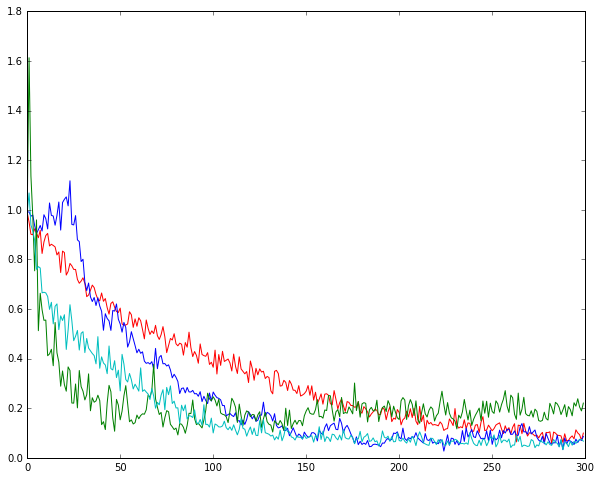

In [9]:
sgd_x, sgd_y = zip(*history_sgd)
momentum_x, momentum_y = zip(*history_momentum)
adagrad_x, adagrad_y = zip(*history_adagrad)
rmsprop_x, rmsprop_y = zip(*history_rmsprop)
adam_x, adam_y = zip(*history_adam)
grad_descent_plot = plt.plot(sgd_x, sgd_y, 'r-', 
                             momentum_x, momentum_y, 'b-', 
                             adagrad_x, adagrad_y, 'g-', 
                             rmsprop_x, rmsprop_y, 'c-',
                             adam_x, adam_y, 'm-')
plt.show()